# Data

### For now, sampling from "Main Description" and "Ingram" only (reasoning below)

In [5]:
import pandas as pd
import ast

df = pd.read_csv("data.csv")
df["BISAC"] = df["BISAC"].apply(ast.literal_eval)


df_main_ingram = df[
    (df["annot_type"] == "Main Description") & (df["annot_source"] == "Ingram")
].copy()

sample_size = 10000

df_sampled = df_main_ingram.sample(sample_size, random_state=42, ignore_index=True)

### annot_type

In [ ]:
print(df["annot_type"].value_counts(normalize=True))

annot_type
Main Description               0.956094
Author Affiliation             0.038057
Long Description               0.005337
Un-Paid Annotation             0.000323
Library of Congress Summary    0.000128
Back Cover Copy                0.000054
Authored Title                 0.000007
Name: proportion, dtype: float64


### annot_source

In [ ]:
print(df["annot_source"].value_counts(normalize=True))

annot_source
Ingram                              0.437138
Publisher                           0.417434
Ingram Syndetics                    0.140239
Syndetics                           0.001900
Blackwell                           0.001584
Bowker Staff                        0.000539
Rittenhouse                         0.000478
DILVE - Spanish ISBN Agency         0.000323
BOC                                 0.000101
German - Libri                      0.000081
UK Video for Syndetics              0.000040
Swedish -  BTJ                      0.000027
Library Journal                     0.000027
British Library                     0.000027
New Zealand Summary                 0.000027
English - Libri                     0.000020
Best Books for Children, 5th ed.    0.000007
Thorpe                              0.000007
Name: proportion, dtype: float64


# Vectorizing

### BISAC codes on the entire dataset (one hot encoded by just the alpha part)

In [ ]:
import re


def get_df_bisac(df):
    df["BISAC"] = df["BISAC"].apply(
        lambda x: [re.sub(r"[^a-zA-Z]", "", bisac) for bisac in x]
    )

    unique_bisacs = set(bisac for row in df["BISAC"] for bisac in row)

    df_bisac = pd.DataFrame()
    for bisac in unique_bisacs:
        df_bisac[bisac] = df["BISAC"].apply(lambda x: 1 if bisac in x else 0)

    return df_bisac


df_main_ingram_bisac = get_df_bisac(df_main_ingram)
print(f"Number of distinct bisac codes: {len(df_main_ingram_bisac.columns)}")
df_main_ingram_bisac.sum().sort_values(ascending=False)

Number of distinct bisac codes: 59


FIC    18969
HIS     6903
BIO     5705
CKB     3792
SOC     3358
BUS     2993
POL     2581
TRV     2564
JUV     2313
REL     2155
SEL     1970
HEA     1831
YAF     1686
SCI     1608
SPO     1402
PHI     1352
LIT     1244
COM     1172
PSY     1144
FAM     1074
ART     1049
OCC     1041
NAT     1016
POE      938
PER      897
LCO      880
HUM      806
CRA      787
TEC      732
REF      717
MED      691
DRA      681
MUS      666
TRU      576
LAN      531
PHO      503
JNF      482
EDU      455
HOM      448
GAR      437
ARC      330
DES      321
MAT      304
LAW      288
PET      277
STU      236
GAM      228
TRA      217
ANT      182
YAN      173
FOR      172
CGN      124
NON       51
BIB       22
VSS        1
WBA        1
WSQ        1
CUR        1
HB         1
dtype: int64

In [ ]:
print("Frequencies of number of BISAC codes per book")
df_main_ingram_bisac.sum(axis=1).value_counts(normalize=True)

Frequencies of number of BISAC codes per book


1     0.716986
2     0.189861
3     0.079838
4     0.010648
5     0.002029
6     0.000436
7     0.000117
8     0.000050
11    0.000034
Name: proportion, dtype: float64

### BISAC for our sample of 10000 books

In [ ]:
from sklearn.preprocessing import StandardScaler

df_sampled_bisac = get_df_bisac(df_sampled)

scaler = StandardScaler()
df_sampled_bisac_scaled = pd.DataFrame(scaler.fit_transform(df_sampled_bisac))
df_sampled_bisac_scaled

df_sampled_bisac_scaled

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-0.069449,-0.086929,-0.064944,-0.146103,-0.360831,-0.131507,-0.120447,-0.014144,-0.328497,-0.123404,...,-0.066479,-0.041266,-0.132682,-0.152748,-0.259738,-0.09897,-0.198749,-0.104977,-0.111594,-0.057541
1,-0.069449,-0.086929,-0.064944,-0.146103,2.771382,-0.131507,-0.120447,-0.014144,3.044165,-0.123404,...,-0.066479,-0.041266,-0.132682,-0.152748,-0.259738,-0.09897,-0.198749,-0.104977,-0.111594,-0.057541
2,-0.069449,-0.086929,-0.064944,-0.146103,-0.360831,-0.131507,-0.120447,-0.014144,-0.328497,-0.123404,...,-0.066479,-0.041266,-0.132682,-0.152748,-0.259738,-0.09897,-0.198749,-0.104977,-0.111594,-0.057541
3,-0.069449,-0.086929,-0.064944,-0.146103,-0.360831,-0.131507,-0.120447,-0.014144,3.044165,-0.123404,...,-0.066479,-0.041266,-0.132682,-0.152748,-0.259738,-0.09897,-0.198749,-0.104977,8.961072,-0.057541
4,-0.069449,-0.086929,-0.064944,-0.146103,-0.360831,-0.131507,-0.120447,-0.014144,-0.328497,-0.123404,...,-0.066479,-0.041266,-0.132682,-0.152748,-0.259738,-0.09897,-0.198749,-0.104977,-0.111594,-0.057541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.069449,-0.086929,-0.064944,-0.146103,2.771382,-0.131507,-0.120447,-0.014144,-0.328497,-0.123404,...,-0.066479,-0.041266,-0.132682,-0.152748,-0.259738,-0.09897,-0.198749,-0.104977,-0.111594,-0.057541
9996,-0.069449,-0.086929,-0.064944,-0.146103,-0.360831,-0.131507,-0.120447,-0.014144,-0.328497,-0.123404,...,-0.066479,-0.041266,-0.132682,-0.152748,-0.259738,-0.09897,5.031480,-0.104977,-0.111594,-0.057541
9997,-0.069449,-0.086929,-0.064944,-0.146103,-0.360831,-0.131507,-0.120447,-0.014144,-0.328497,-0.123404,...,-0.066479,-0.041266,-0.132682,-0.152748,-0.259738,-0.09897,-0.198749,-0.104977,-0.111594,-0.057541
9998,-0.069449,-0.086929,-0.064944,-0.146103,-0.360831,-0.131507,-0.120447,-0.014144,-0.328497,-0.123404,...,-0.066479,-0.041266,-0.132682,-0.152748,-0.259738,-0.09897,-0.198749,-0.104977,-0.111594,-0.057541


### Summaries (via doc2vec)

In [ ]:
import os
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from tqdm import tqdm

model_name = f"d2v_{sample_size}.model"
model = None

if model_name in os.listdir():
    model = Doc2Vec.load(model_name)
else:
    # Preprocess the text data
    tagged_data = [
        TaggedDocument(
            words=word_tokenize(summary.lower()),
            tags=[str(i)],
        )
        for i, summary in enumerate(df_sampled["summary"])
    ]

    # Train the Doc2Vec model
    max_epochs = 100
    vec_size = 50
    alpha = 0.025

    model = Doc2Vec(
        vector_size=vec_size, alpha=alpha, min_alpha=0.00025, min_count=1, dm=1
    )

    model.build_vocab(tagged_data)

    for epoch in tqdm(range(max_epochs)):
        model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)
        # decrease the learning rate
        model.alpha -= 0.0002
        # fix the learning rate, no decay
        model.min_alpha = model.alpha

    model.save(model_name)


# Infer vectors for 'summary' column
summary_vectors = [
    model.infer_vector(word_tokenize(summary.lower()))
    for summary in df_sampled["summary"]
]
df_sampled_summary = pd.DataFrame(summary_vectors)

# Scale the vectors
scaler = StandardScaler()
df_sampled_summary_scaled = pd.DataFrame(scaler.fit_transform(df_sampled_summary))
df_sampled_summary_scaled

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-2.395084,2.669782,2.427065,-1.345214,0.372340,-3.254095,2.394575,-0.904252,0.024667,-0.585148,...,2.943268,0.254114,-0.219505,-1.730107,-1.672658,-0.970841,0.547204,2.328536,-0.069586,2.649248
1,-1.715435,-1.401228,-0.978897,-0.016576,0.021632,0.309259,-0.751561,-0.009960,-1.988130,0.067243,...,2.103341,1.076187,0.693082,0.708456,0.258071,-0.097099,-0.435830,0.684414,0.473266,1.141276
2,0.257514,-0.275438,0.024629,-0.088510,1.004499,0.039241,0.395646,-0.983080,-1.968729,0.786553,...,-1.517136,0.214295,-1.152760,-0.800825,1.299500,-0.620003,-1.076938,-0.139645,1.697140,-0.461781
3,0.939298,0.527429,-0.081674,-0.982692,-1.008414,0.211566,0.907189,-0.381207,-1.311886,0.191226,...,-0.326234,0.208905,-0.730363,2.239839,-1.393224,0.040148,-1.222632,-1.964802,0.251132,-1.268919
4,-0.528495,1.134973,-2.075500,-0.526688,0.492951,1.642034,-0.316978,1.176699,0.369967,-1.307448,...,-0.515290,1.198423,-0.347258,0.134088,-0.913591,0.906923,-1.257757,0.396342,0.492638,-0.336549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-2.946446,1.640161,1.705403,-1.970069,1.162626,-0.311513,1.650526,1.442145,-0.479893,-1.138270,...,-0.350897,0.302155,-0.160415,0.368075,-2.868948,1.749262,-1.795491,-0.009454,2.848948,1.714061
9996,1.398171,0.434568,1.047271,0.377549,-1.287477,-0.778789,-2.131901,-1.365272,-0.448969,-0.134644,...,1.029740,-0.254063,-1.666668,-2.843530,0.144075,0.393796,-1.041587,1.804420,-1.835235,0.651668
9997,0.351896,-0.283947,0.245024,0.182569,0.760323,1.607393,-0.427155,-0.080303,0.142721,-1.711287,...,0.212736,0.363085,-0.553691,-1.018430,1.862019,0.005135,1.405843,0.477382,0.173594,-0.629930
9998,-0.598185,-0.477241,-0.430778,1.558537,0.217827,-0.358817,0.194210,0.263394,0.215538,0.101599,...,-0.243511,0.592858,-0.117335,0.199732,-0.915434,0.661631,0.450999,0.173844,1.250627,0.517549


### BISAC + Summaries

In [ ]:
df_sampled_combined_scaled = pd.concat(
    [df_sampled_bisac_scaled, df_sampled_summary_scaled], axis=1
)
df_sampled_combined_scaled

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.069449,-0.086929,-0.064944,-0.146103,-0.360831,-0.131507,-0.120447,-0.014144,-0.328497,-0.123404,...,2.943268,0.254114,-0.219505,-1.730107,-1.672658,-0.970841,0.547204,2.328536,-0.069586,2.649248
1,-0.069449,-0.086929,-0.064944,-0.146103,2.771382,-0.131507,-0.120447,-0.014144,3.044165,-0.123404,...,2.103341,1.076187,0.693082,0.708456,0.258071,-0.097099,-0.435830,0.684414,0.473266,1.141276
2,-0.069449,-0.086929,-0.064944,-0.146103,-0.360831,-0.131507,-0.120447,-0.014144,-0.328497,-0.123404,...,-1.517136,0.214295,-1.152760,-0.800825,1.299500,-0.620003,-1.076938,-0.139645,1.697140,-0.461781
3,-0.069449,-0.086929,-0.064944,-0.146103,-0.360831,-0.131507,-0.120447,-0.014144,3.044165,-0.123404,...,-0.326234,0.208905,-0.730363,2.239839,-1.393224,0.040148,-1.222632,-1.964802,0.251132,-1.268919
4,-0.069449,-0.086929,-0.064944,-0.146103,-0.360831,-0.131507,-0.120447,-0.014144,-0.328497,-0.123404,...,-0.515290,1.198423,-0.347258,0.134088,-0.913591,0.906923,-1.257757,0.396342,0.492638,-0.336549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.069449,-0.086929,-0.064944,-0.146103,2.771382,-0.131507,-0.120447,-0.014144,-0.328497,-0.123404,...,-0.350897,0.302155,-0.160415,0.368075,-2.868948,1.749262,-1.795491,-0.009454,2.848948,1.714061
9996,-0.069449,-0.086929,-0.064944,-0.146103,-0.360831,-0.131507,-0.120447,-0.014144,-0.328497,-0.123404,...,1.029740,-0.254063,-1.666668,-2.843530,0.144075,0.393796,-1.041587,1.804420,-1.835235,0.651668
9997,-0.069449,-0.086929,-0.064944,-0.146103,-0.360831,-0.131507,-0.120447,-0.014144,-0.328497,-0.123404,...,0.212736,0.363085,-0.553691,-1.018430,1.862019,0.005135,1.405843,0.477382,0.173594,-0.629930
9998,-0.069449,-0.086929,-0.064944,-0.146103,-0.360831,-0.131507,-0.120447,-0.014144,-0.328497,-0.123404,...,-0.243511,0.592858,-0.117335,0.199732,-0.915434,0.661631,0.450999,0.173844,1.250627,0.517549


# PCA

### Single label

In [ ]:
# Get the most frequent BISAC codes from each row. If there are multiple codes with the same count, take the first one
y_single_label = df_sampled["BISAC"].apply(
    lambda x: sorted(set(x), key=lambda bisac: (-x.count(bisac), x.index(bisac)))[0]
)

y_single_label.value_counts()

BISAC
FIC    3114
HIS     724
CKB     555
BIO     492
BUS     392
JUV     374
TRV     349
YAF     292
REL     263
SOC     252
POL     237
HEA     207
SCI     189
COM     179
SEL     163
PHI     145
SPO     134
POE     116
LIT     113
ART     107
PSY     106
PER      99
CRA      92
FAM      85
MUS      85
NAT      83
DRA      83
OCC      80
JNF      71
LCO      69
MED      65
HUM      64
REF      56
TEC      55
GAR      51
PHO      42
EDU      41
LAN      40
TRU      38
MAT      35
HOM      30
PET      29
ARC      26
YAN      25
STU      25
DES      24
LAW      23
FOR      18
GAM      18
TRA      15
ANT      10
NON      10
CGN       5
BIB       2
WSQ       1
WBA       1
VSS       1
Name: count, dtype: int64

### Single label with only 10 classes

In [ ]:
from collections import Counter


top_9 = y_single_label.value_counts().index[:9].to_list()


def get_single_label_bisac_10(bisacs):
    counts = list(Counter(bisacs).items())
    counts.sort(key=lambda x: x[1], reverse=True)
    for bisac, _ in counts:
        if bisac in top_9:
            return bisac
    return "OTHER"


y_single_label_10 = df_sampled["BISAC"].apply(get_single_label_bisac_10)

y_single_label_10.value_counts()

BISAC
FIC      3132
OTHER    2686
HIS       965
BIO       759
CKB       612
BUS       453
TRV       395
JUV       376
REL       329
YAF       293
Name: count, dtype: int64

/tmp/ipykernel_174851/2085699001.py:43: UserWarning: The palette list has more values (57) than needed (10), which may not be intended.
  sns.scatterplot(
/tmp/ipykernel_174851/2085699001.py:43: UserWarning: The palette list has more values (57) than needed (10), which may not be intended.
  sns.scatterplot(
/tmp/ipykernel_174851/2085699001.py:43: UserWarning: The palette list has more values (57) than needed (10), which may not be intended.
  sns.scatterplot(


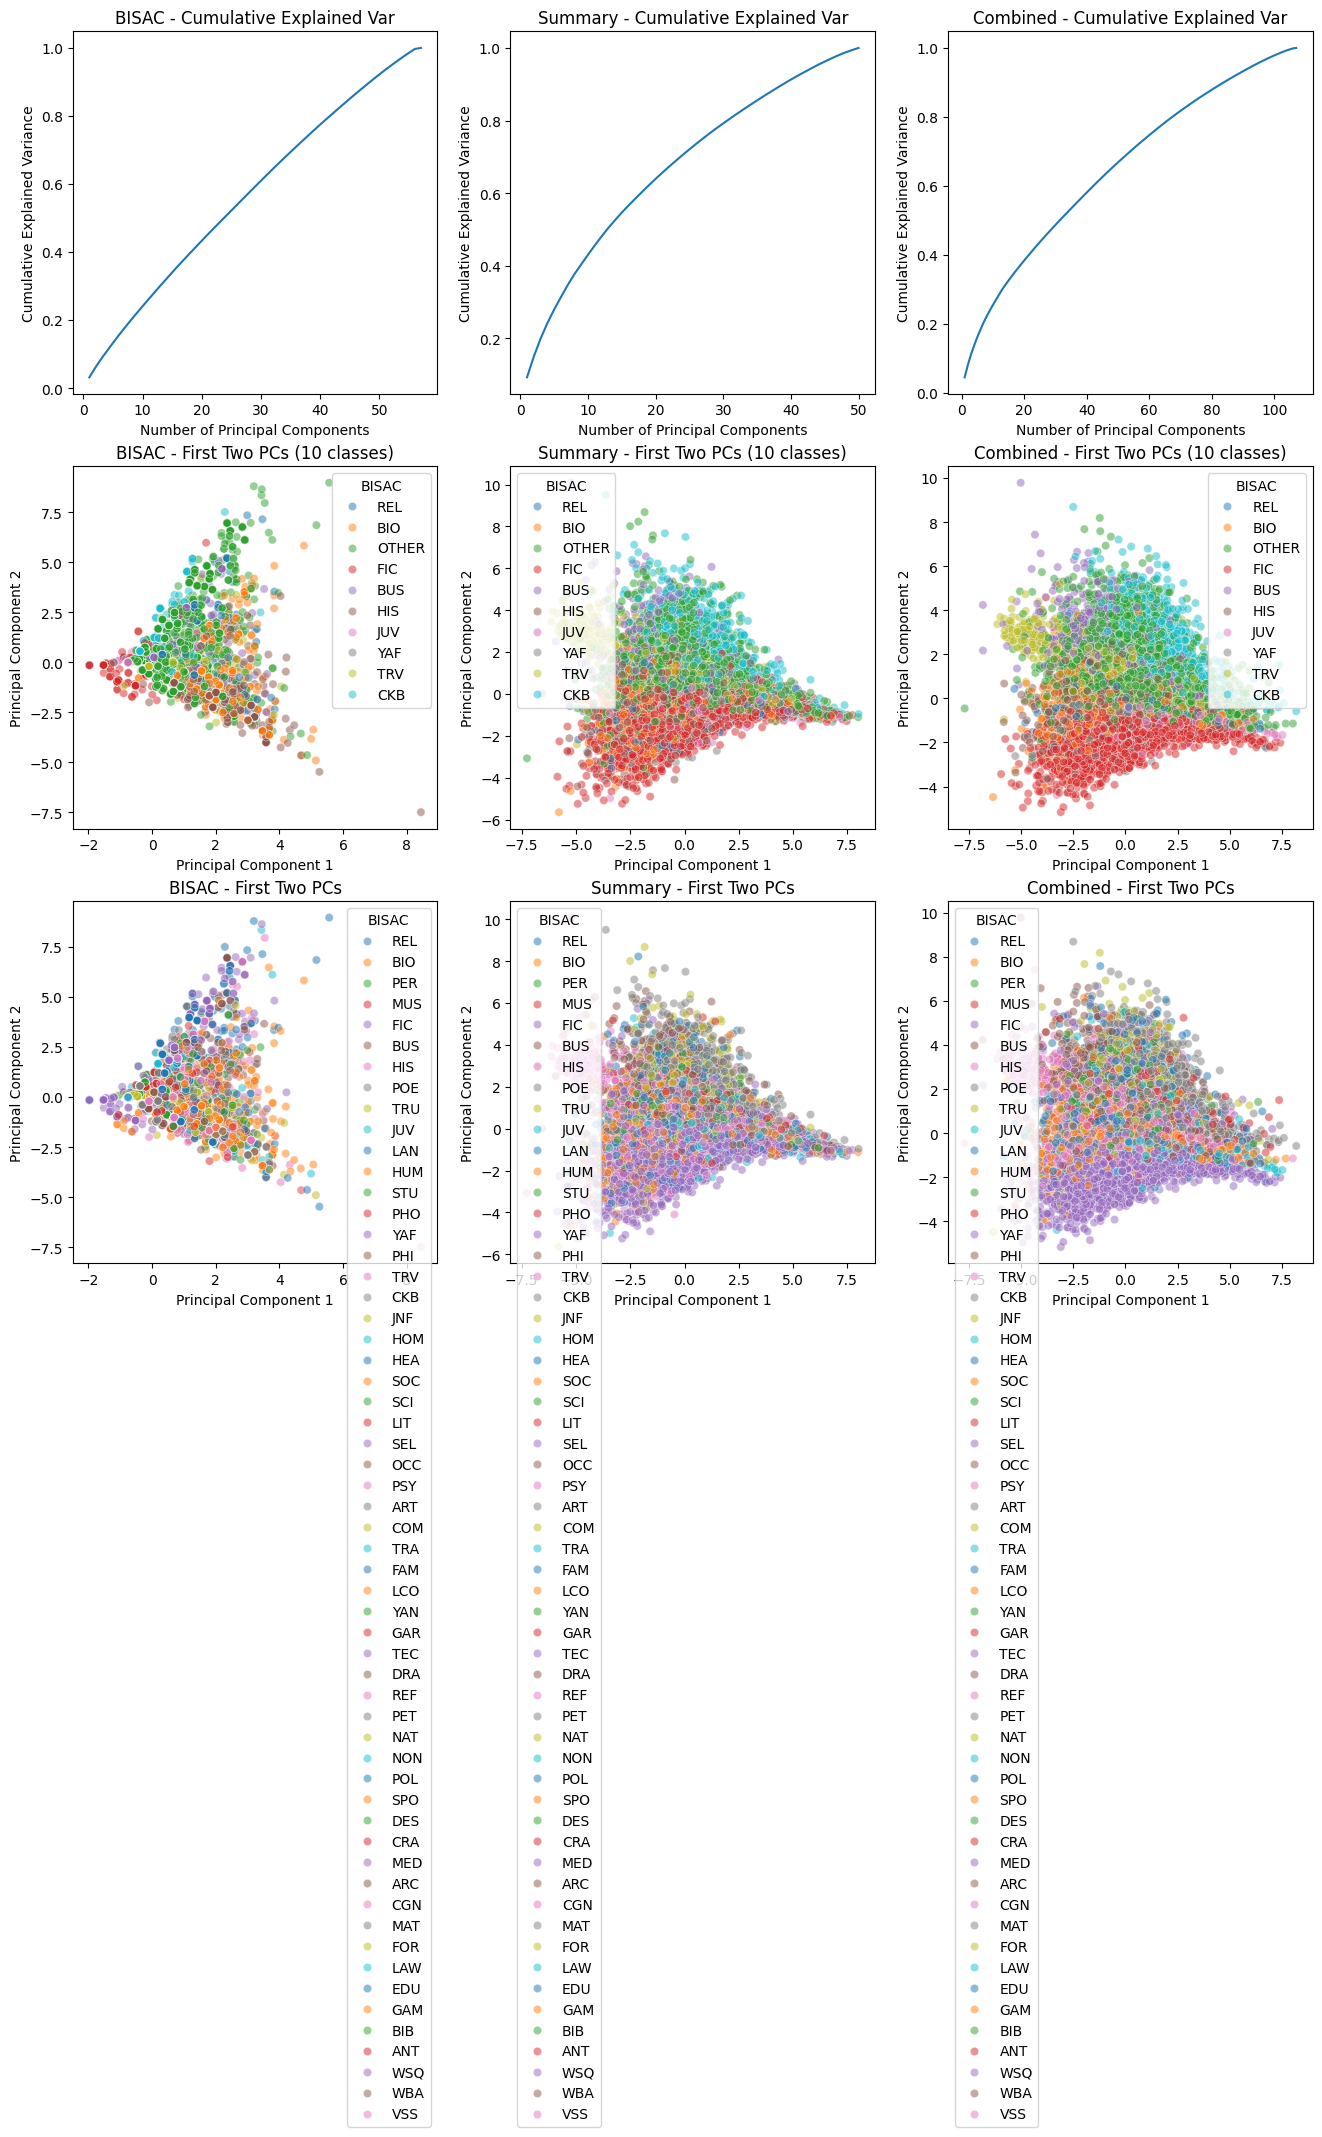

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Get unique labels
unique_labels = y_single_label.unique()
unique_labels_10 = y_single_label_10.unique()

# Define color palette
palette = sns.color_palette("tab10", len(unique_labels))
palette_10 = sns.color_palette("tab10", len(unique_labels_10))

plt.figure(figsize=(16, 16))

for i, (df, title) in enumerate(
    zip(
        [
            df_sampled_bisac_scaled,
            df_sampled_summary_scaled,
            df_sampled_combined_scaled,
        ],
        ["BISAC", "Summary", "Combined"],
    ),
    1,
):
    pca = PCA()
    pca_results = pca.fit_transform(df)
    explained_variance_cumulative = np.cumsum(pca.explained_variance_ratio_)

    # Plot cumulative explained variance
    plt.subplot(3, 3, i)
    sns.lineplot(
        x=np.arange(1, len(explained_variance_cumulative) + 1),
        y=explained_variance_cumulative,
    )
    plt.title(f"{title} - Cumulative Explained Var")
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Cumulative Explained Variance")

    # Plot first two principal components with colors based on labels
    plt.subplot(3, 3, i + 3)
    sns.scatterplot(
        x=pca_results[:, 0],
        y=pca_results[:, 1],
        alpha=0.5,
        hue=y_single_label_10,
        palette=palette,
    )
    plt.title(f"{title} - First Two PCs (10 classes)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")

    # Plot first two principal components with colors based on labels
    plt.subplot(3, 3, i + 6)
    sns.scatterplot(
        x=pca_results[:, 0],
        y=pca_results[:, 1],
        alpha=0.5,
        hue=y_single_label,
        palette=palette,
    )
    plt.title(f"{title} - First Two PCs")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")


plt.show()

# Clustering

### Single label with only 10 classes

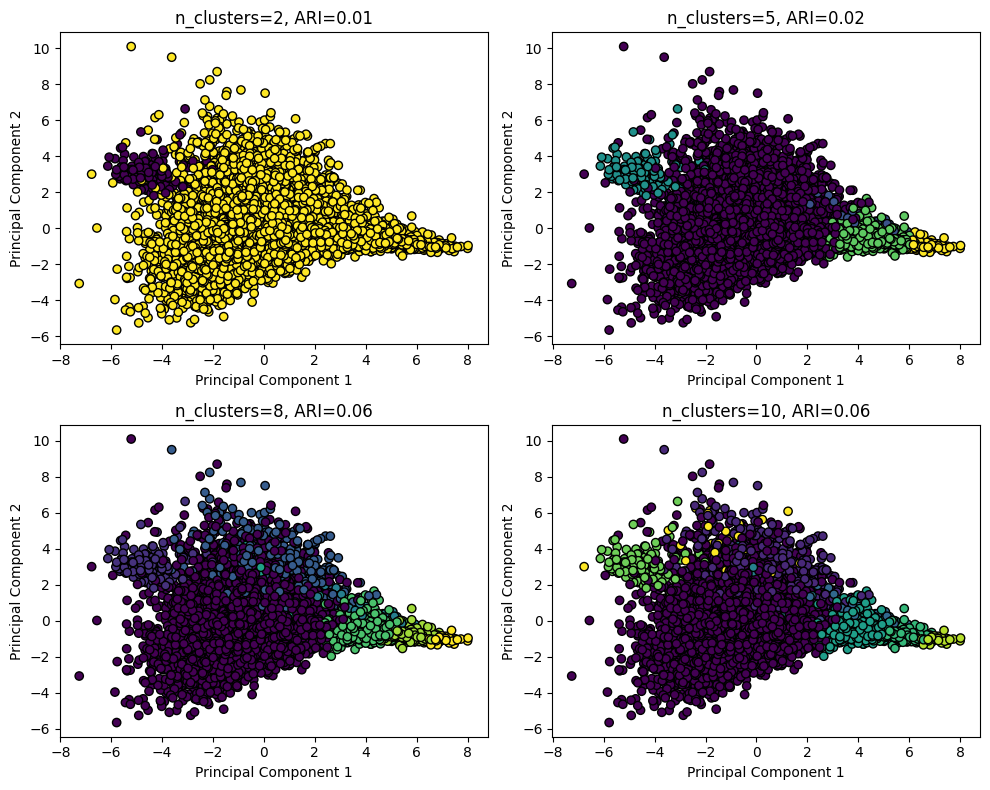

In [ ]:
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score

# PCA for visualization
pca = PCA(n_components=2)
pca_results = pca.fit_transform(df_sampled_summary_scaled)

# Create a figure to hold subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for n_clusters, ax in zip([2, 5, 8, 10], axs.flat):
    clustering = SpectralClustering(
        n_clusters=n_clusters,
        assign_labels="kmeans",
        random_state=42,
        affinity="nearest_neighbors",
        n_neighbors=10,
    ).fit(df_sampled_summary_scaled)

    ari = adjusted_rand_score(y_single_label_10, clustering.labels_)

    ax.scatter(
        pca_results[:, 0],
        pca_results[:, 1],
        c=clustering.labels_,
        cmap="viridis",
        edgecolors="k",
    )
    ax.set_title(f"n_clusters={n_clusters}, ARI={ari:.2f}")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")

plt.tight_layout()
plt.show()

todo: find 50 nearest pairs in embedding space, then look at their BISAC codes to see if they are similar

# Classification

### Multi-class, single label (top 10)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier


param_grid = {
    "C": [0.01, 0.03, 0.1, 0.3, 1],
    "solver": ["lbfgs", "liblinear"],
}

X_train, X_test, y_train, y_test = train_test_split(
    df_sampled_summary_scaled, y_single_label_10, test_size=0.2, random_state=42
)

logistic_reg = LogisticRegression(max_iter=1000, random_state=42)
grid_search = GridSearchCV(logistic_reg, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)


print("CV Best Parameters:", grid_search.best_params_)
print("CV Best Score:", grid_search.best_score_, "\n")

print("Test results:")
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

CV Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}
CV Best Score: 0.6751250000000001 

Test results:
              precision    recall  f1-score   support

         BIO       0.54      0.36      0.43       152
         BUS       0.83      0.59      0.69        94
         CKB       0.88      0.80      0.84       124
         FIC       0.67      0.89      0.77       611
         HIS       0.58      0.45      0.51       189
         JUV       0.64      0.23      0.34        92
       OTHER       0.63      0.73      0.68       552
         REL       0.64      0.37      0.47        62
         TRV       0.91      0.66      0.77        65
         YAF       0.10      0.02      0.03        59

    accuracy                           0.66      2000
   macro avg       0.64      0.51      0.55      2000
weighted avg       0.65      0.66      0.64      2000



todo: see for eg yaf, see where it's getting them wrong. fiction?